# (E7) 1D Toy Regression Task 
In this exercise, you will be given an example of simple 1-D regression task. 
You should be able to replicate the results given here if you have completed (E2)-(E5) correctly.

It would be best if you have a Python IDE (integrated development environment) such as [PyCharm](https://www.jetbrains.com/pycharm/) and [Anaconda](anaconda.com) is installed because they will make your life easier! If not, you may want to work on the assignment using Google Colab. In any cases, what you need to do is 1) to fill in the blanks in .py files; and 2) to import the files (e.g., layer.py, optim.py, model.py, etc) that you have completed for use. Here are some scenarios how you would go about doing the assignment: 

#### Without Google Colab: Python IDE + Anaconda 
If you have a Python IDE and Anaconda installed, you can do one of the following:
- Edit .py files in the IDE. Then, simply open .ipynb file also in the IDE where you can edit and run codes. 
- Your IDE might not support running .ipynb files. However, since you have installed Anaconda, you can just open this notebook using Jupyter Notebook.

In both of these cases, you can simply import .py files in this .ipynb file:
```python
from model import NeuralNetwork
```
 
#### With Google Colab
- Google Colab has an embedded code editor. So, you could simply upload all .py files to Google Colab and edit the files there. Once you upload the files, double click a file that you want to edit. Please **make sure that you download up-to-date files frequently**, otherwise Google Colab might accidentally restart and all your files might be gone.
- If you feel like the above way is cumbersome, you could instead use any online Python editors for completing .py files (e.g., see [repl.it](https://repl.it/languages/python3)). Also, it's not impossible that you edit the files using any text editors, but they don't show you essential Python grammar information, so you'll be prone to make mistakes in that case. Once you are done editing, you can either upload the files to Colab or follow the instruction below. 
 
- If you have *git clone*d the assignment repository to a directory in your Google Drive (or you have the files stored in the Drive anyway), you can do the following:
```jupyterpython
from google.colab import drive
drive.mount('/content/drive/')          # this will direct you to a link where you can get an authorization key
import sys
sys.path.append('/content/drive/My Drive/your-directory-where-the-python-files-exist')
```
Then, you are good to go. When you change a .py file, make sure it is synced to the drive, then you need to re-run the above lines to get access to the latest version of the file. Note that you should give correct path to *sys.path.append* method.

Now, let's get started!

## Target Function
Here's a 1-dimensional nonlinear function that you want to predict, which is generated by the code below.<br>

In [1]:
from model import NeuralNetwork

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

def regression(N=2000):
    np.random.seed(1)
    X = 0.5 * np.random.randn(N, 1) + 0.1
    X = 0.75 * X - 0.1

    Y = -(8 * X ** 2 + 0.1 * X + 0.1)
    Y = np.exp(Y) + 0.05 * np.random.randn(N, 1)
    Y /= np.max(np.abs(Y))
    return X, Y

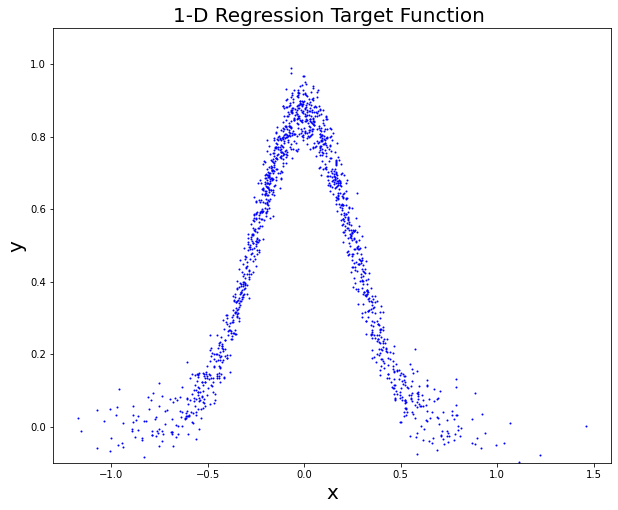

In [3]:
X, Y = regression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_train[:, 0], y_train, 'b.', markersize=2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("1-D Regression Target Function ", fontsize=20)
plt.show()

## A Linear Network to Learn the Target Function
Now, we are going to create a linear neural network model.

In [4]:
from model import NeuralNetwork
from layer import FCLayer
from loss import MSELoss
from optim import SGD, Adam, RMSProp

# define a network
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True)) # add a fully connected layer with 16 hidden nodes
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))   # add the output layer which maps hidden nodes to the output

In [5]:
# Set up loss function
loss = MSELoss()            # use MSE loss as we are doing regression
nn.set_loss(loss)           # link the loss with the network

In [6]:
# Set hyperparameters
lr = 0.001                  # learning rate
batch_size = 32             # mini-batch size
epochs = 300                # number of epochs
freq = epochs // 10         # how often shall we print out test results

In [7]:
# set up optimizer and link to the network
optimizer = Adam(nn.parameters(), lr=lr)      # Adam optimizer
nn.set_optimizer(optimizer)

In [8]:
# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]                        # number of training samples

loss_hist = []                              # list to store loss history

for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]

        # feed forward
        pred = nn.predict(x_batch)

        # Error
        loss += nn.loss(pred, y_batch) * batch_size / N

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.47789	Test RMSE: 0.39976
Epoch 31/300	RMSE=0.30283	Test RMSE: 0.30602
Epoch 61/300	RMSE=0.30328	Test RMSE: 0.30527
Epoch 91/300	RMSE=0.30331	Test RMSE: 0.30602
Epoch 121/300	RMSE=0.30270	Test RMSE: 0.30512
Epoch 151/300	RMSE=0.30352	Test RMSE: 0.30531
Epoch 181/300	RMSE=0.30311	Test RMSE: 0.30511
Epoch 211/300	RMSE=0.30279	Test RMSE: 0.30567
Epoch 241/300	RMSE=0.30283	Test RMSE: 0.30592
Epoch 271/300	RMSE=0.30299	Test RMSE: 0.30521

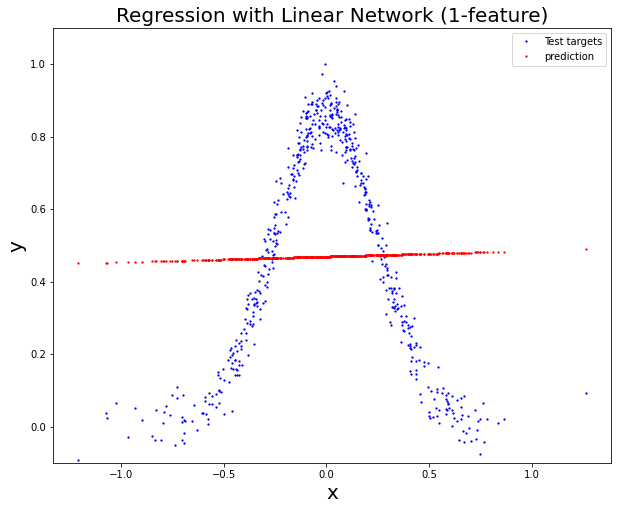

In [9]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(1), fontsize=20)
plt.show()


### Linear Network with Feature Augmented
Clearly, the linear network is not capable of learning the nonlinear function. However, we can actually do at least better than this by augmenting some features to X. For example, we can use the following function to add polynomials of X as features.

In [10]:
def augment_feature(x, n):
    # augment n polynomials of x
    if n < 2:
        return x
    temp_x = x.copy()
    for i in range(2, n+1):
        x_poly = np.power(temp_x, i)        # 'i'th polynomial of x
        x = np.hstack((x, x_poly))
    return x

Now, let's add X^2 to X and learn a linear network again.

In [11]:
feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.43786	Test RMSE: 0.30530
Epoch 31/300	RMSE=0.19150	Test RMSE: 0.19101
Epoch 61/300	RMSE=0.19141	Test RMSE: 0.19064
Epoch 91/300	RMSE=0.19199	Test RMSE: 0.19073
Epoch 121/300	RMSE=0.19145	Test RMSE: 0.19084
Epoch 151/300	RMSE=0.19150	Test RMSE: 0.19070
Epoch 181/300	RMSE=0.19137	Test RMSE: 0.19083
Epoch 211/300	RMSE=0.19157	Test RMSE: 0.19085
Epoch 241/300	RMSE=0.19167	Test RMSE: 0.19068
Epoch 271/300	RMSE=0.19158	Test RMSE: 0.19076

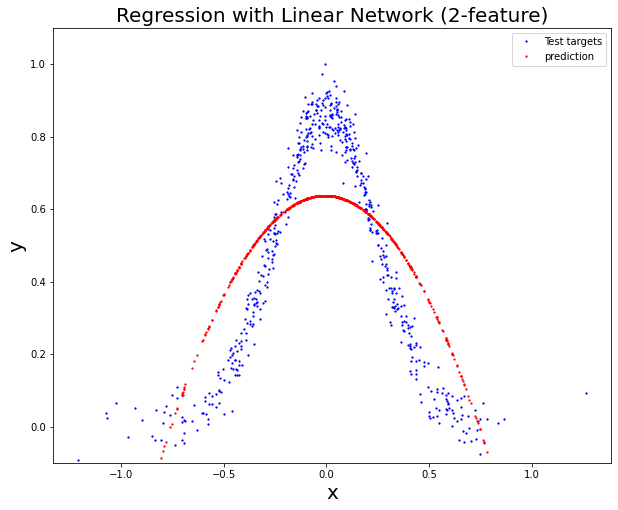

In [12]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loss history with lr = 0.001 reaching a min loss of 0.03658')

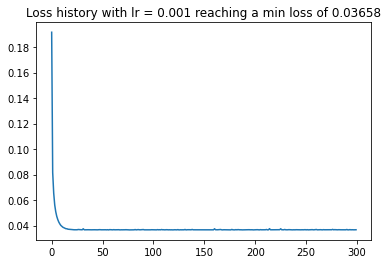

In [13]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.001 reaching a min loss of {:.5f}".format(min(loss_hist)))

So, the result is better than when we used the single feature. However, it is hard to say that our prediction is good!

## (E7) Your Turn:  Non-linear Neural Network
Without having to bother with feature engineering, you can definitely improve the test performance by, for example, introducing nonlinear activation functions, changing the network architecture, adjusting the learning rate, training more epochs, and (or) using a different optimizer.. So, **it's your turn to try different configurations of the network.** *Experiment with more than 3 configurations of these to get better test performance (test RMSE), and report your trials by summarizing the configurations and performance in a **table**. Additionally, **plot** the test targets and predictions as in the above figures.*


### Decreasing learning rate to 0.0001

In [15]:
feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.0001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.54648	Test RMSE: 0.52388
Epoch 31/300	RMSE=0.23100	Test RMSE: 0.23549
Epoch 61/300	RMSE=0.19301	Test RMSE: 0.19825
Epoch 91/300	RMSE=0.17807	Test RMSE: 0.18214
Epoch 121/300	RMSE=0.17054	Test RMSE: 0.17364
Epoch 151/300	RMSE=0.16569	Test RMSE: 0.16786
Epoch 181/300	RMSE=0.16156	Test RMSE: 0.16323
Epoch 211/300	RMSE=0.15774	Test RMSE: 0.15924
Epoch 241/300	RMSE=0.15461	Test RMSE: 0.15564
Epoch 271/300	RMSE=0.15162	Test RMSE: 0.15233

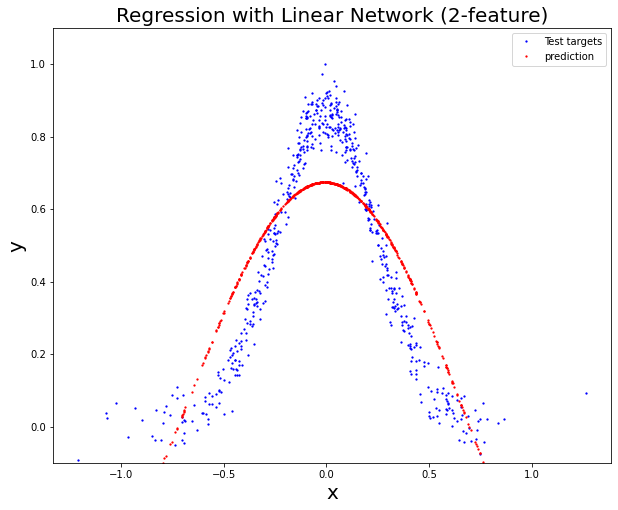

In [16]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loss history with lr = 0.0001 reaching a min loss of 0.02216')

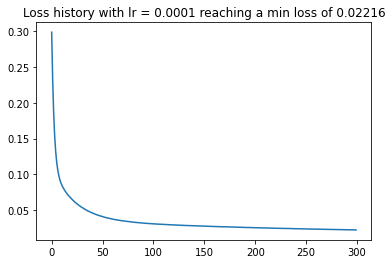

In [17]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.0001 reaching a min loss of {:.5f}".format(min(loss_hist)))

In [18]:
feature_num = 3
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.0001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=1.26920	Test RMSE: 0.52775
Epoch 31/300	RMSE=0.21560	Test RMSE: 0.22143
Epoch 61/300	RMSE=0.18669	Test RMSE: 0.19091
Epoch 91/300	RMSE=0.17397	Test RMSE: 0.17643
Epoch 121/300	RMSE=0.16544	Test RMSE: 0.16718
Epoch 151/300	RMSE=0.15900	Test RMSE: 0.16084
Epoch 181/300	RMSE=0.15409	Test RMSE: 0.15623
Epoch 211/300	RMSE=0.15024	Test RMSE: 0.15316
Epoch 241/300	RMSE=0.14728	Test RMSE: 0.15080
Epoch 271/300	RMSE=0.14531	Test RMSE: 0.14922

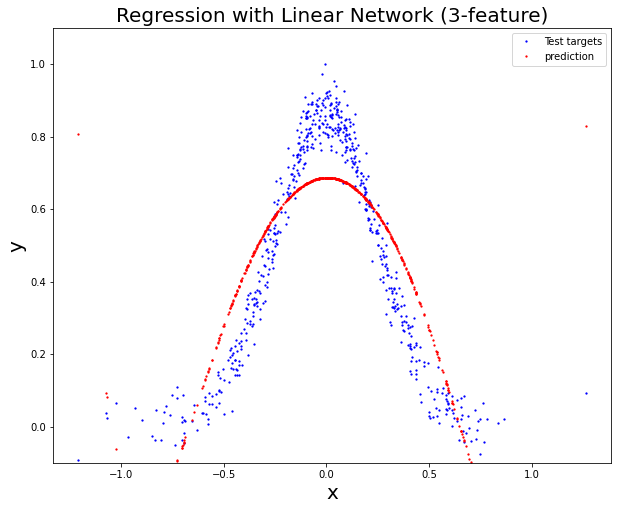

In [19]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loss history with lr = 0.00001 reaching a min loss of 0.02054')

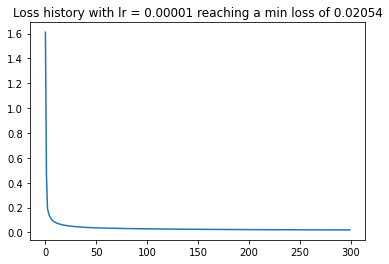

In [20]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.00001 reaching a min loss of {:.5f}".format(min(loss_hist)))

### Changing number of epochs

In [21]:
# feature_num = 2
# x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
# nn = NeuralNetwork()
# nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
# nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

# loss = MSELoss()
# nn.set_loss(loss)

# # set hyperparameters
# lr = 0.001
# batch_size = 32
# epochs = 400
# freq = epochs // 10

# optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
# nn.set_optimizer(optimizer)

# # Train the model
# inds = list(range(x_train.shape[0]))
# N = x_train.shape[0]

# loss_hist = []
# total_loss_hist = []
# total_pred_hist = []
# total_y_batches = []
# for epoch in range(epochs):
#     # randomly shuffle the training data at the beginning of each epoch
#     inds = np.random.permutation(inds)
#     x_train = x_train[inds]
#     y_train = y_train[inds]

#     loss = 0
#     for b in range(0, N, batch_size):
#         # get the mini-batch
#         x_batch = x_train[b: b + batch_size]
#         y_batch = y_train[b: b + batch_size]
#         total_y_batches.append(y_batch)

#         # feed forward
#         pred = nn.predict(x_batch)
#         total_pred_hist.append(pred)

#         # Error
        
#         loss += nn.loss(pred, y_batch) * batch_size / N
#         #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
#         total_loss_hist.append(loss)
# #         print(loss)

#         # Back propagation of errors
#         nn.backward(pred, y_batch)

#         # Update parameters
#         nn.optimizer.step()

#     # record loss per epoch
#     loss_hist.append(loss)

#     if epoch % freq == 0:
#         print()
#         print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

#         # Test error
#         pred = nn.predict(x_test, mode=False)
#         rmse = np.sqrt(nn.loss(pred, y_test))
#         print("Test RMSE: {:.5f}".format(rmse), end='')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

In [ ]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.001 and 400 epochs reaching a min loss of {:.5f}".format(min(loss_hist)))

### Adding non-linear function to the output

In [22]:
from activation import Activation
from utils import *

feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))
nn.add(Activation(relu, relu_prime))



loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.45523	Test RMSE: 0.21563
Epoch 31/300	RMSE=0.08291	Test RMSE: 0.08144
Epoch 61/300	RMSE=0.07575	Test RMSE: 0.07401
Epoch 91/300	RMSE=0.07428	Test RMSE: 0.07363
Epoch 121/300	RMSE=0.07404	Test RMSE: 0.07338
Epoch 151/300	RMSE=0.07384	Test RMSE: 0.07312
Epoch 181/300	RMSE=0.07385	Test RMSE: 0.07325
Epoch 211/300	RMSE=0.07373	Test RMSE: 0.07266
Epoch 241/300	RMSE=0.07354	Test RMSE: 0.07273
Epoch 271/300	RMSE=0.07340	Test RMSE: 0.07259

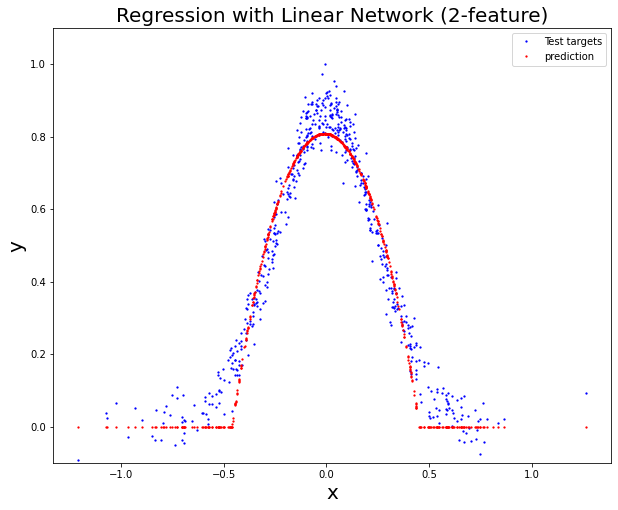

In [23]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loss history with lr = 0.001, 300 epochs, and relu at output layer reaching a min loss of 0.00534')

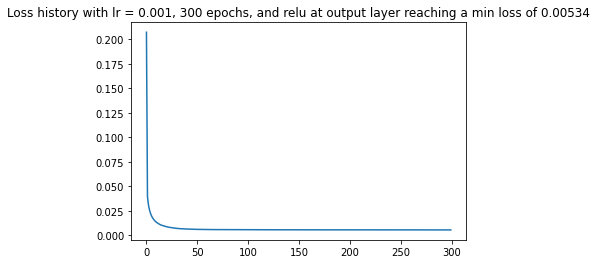

In [24]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.001, 300 epochs, and relu at output layer reaching a min loss of {:.5f}".format(min(loss_hist)))

### Adding intermediate relu layer 

In [25]:
from activation import Activation
from utils import *

feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(Activation(relu, relu_prime))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))
nn.add(Activation(relu, relu_prime))



loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.56405	Test RMSE: 0.57842
Epoch 31/300	RMSE=0.56462	Test RMSE: 0.57842
Epoch 61/300	RMSE=0.56443	Test RMSE: 0.57842
Epoch 91/300	RMSE=0.56420	Test RMSE: 0.57842
Epoch 121/300	RMSE=0.56386	Test RMSE: 0.57842
Epoch 151/300	RMSE=0.56395	Test RMSE: 0.57842
Epoch 181/300	RMSE=0.56383	Test RMSE: 0.57842
Epoch 211/300	RMSE=0.56418	Test RMSE: 0.57842
Epoch 241/300	RMSE=0.56394	Test RMSE: 0.57842
Epoch 271/300	RMSE=0.56414	Test RMSE: 0.57842

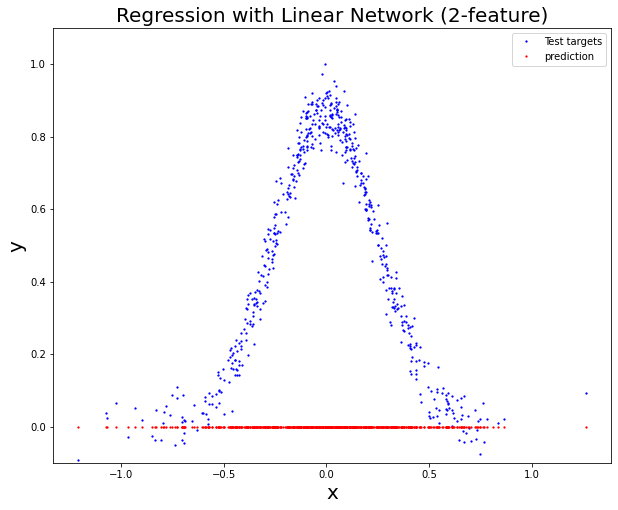

In [26]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loss history with lr = 0.001, 300 epochs, and relu at output layer reaching a min loss of 0.31742')

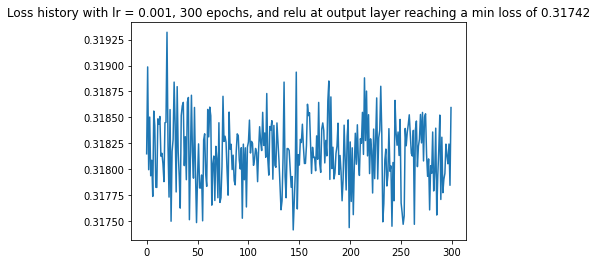

In [27]:
plt.plot(loss_hist)
plt.title("Loss history with lr = 0.001, 300 epochs, and relu at output layer reaching a min loss of {:.5f}".format(min(loss_hist)))

In [28]:
import pandas as pd
d = {'Layer architecture': ['FCN, FCN',
'FCN, FCN',
'FCN, FCN',
'FCN, FCN', 
'FCN, FCN,Relu',
'FCN, Relu, FCN,Relu'
       ], 
     'Epochs': [300,
300,
300,
400,
300, 
300], 
    'Learning rate': [
        0.001,
0.0001,
0.00001,
0.001,
0.001,
0.001
    ], 
    'Min loss': [
        0.03658,
0.02216,
0.02054,
0.03656,
0.00502,0.00323
    ]}
df = pd.DataFrame(data=d)
df

,Layer architecture,Epochs,Learning rate,Min loss
0,"FCN, FCN",300,0.00100,0.03658
1,"FCN, FCN",300,0.00010,0.02216
2,"FCN, FCN",300,0.00001,0.02054
3,"FCN, FCN",400,0.00100,0.03656
4,"FCN, FCN,Relu",300,0.00100,0.00502
5,"FCN, Relu, FCN,Relu",300,0.00100,0.00323
